In [11]:
# case study of Oh point group 
import numpy as np 
from group import MatrixGroup
from spherical import R_X, R_Y, R_Z 

from molecular_vib import vibration_space

# case study, a 3D Octahedral molecuar of symmetry Oh 
molecular = {"na":7, 
             "position":np.array([[0,0,0],[1,0,0],[-1,0,0],[0,1,0],[0,-1,0],[0,0,1],[0,0,-1]]),
             "type": [1,0,0,0,0,0,0]
            }
Octahedral  = vibration_space(molecular)
#Oh 
Id = np.eye(3)
th = np.pi/2
Rx90 = R_X(np.pi/2)
Ry90 = R_Y(np.pi/2)
Rz90 = R_Z(np.pi/2)
sigma_d = np.array([[0,1,0],[1,0,0],[0,0,1]])
Oh = MatrixGroup(generator = [Id,Rx90,Ry90,Rz90,sigma_d])
print(f'|Oh| = {Oh.nG}')
if Oh.nG!=48:
   raise ValueError('# of elements in Oh is inconsistent')
Oh.constructMultiplicationTable()
Oh.conjugacy_class()
if Oh.nClass!=10:
   raise ValueError('# of conjugacy classes in Oh is inconsistent')
print('Oh ConjClass = ',Oh.ConjClass)
#
from BDS import character_solver
ChiSolver = character_solver(Oh.MultilicationTable, Oh.ConjClass)
chi_table = ChiSolver.solve()
print('Character table of Oh = ')
for i in range(Oh.nClass):
   print(" ".join(f"{x:10.2f}" for x in chi_table[:,i]))  # Format numbers to 2 decimal places
#apply C4v to the polynomial of (x,y)
# build the matrix representtaion of C4v on linear function of (x,y)
# Here, it is coincidently the same as the original C4v, for cubic or quadratic, it will be different. 
Oh.decompose(Oh.G, chi_table)
Oh.build_explicit_IRmatrix(chi_table)

#
Octahedral .RepOfGroup(Oh)
Multiplicity = Oh.decompose(Octahedral .G, chi_table)
print('Multiplicity = ',Multiplicity)
basis = Oh.basis_function_break_multiplicity(Octahedral .G, chi_table, excluded_space=Octahedral .acoustic_translation_mode())
for i in range(len(basis)):
   print(basis[f'{i}-th subspace'])
print('all basis = ',len(basis))

|Oh| = 48
[[ 0  1  2 ... 45 46 47]
 [ 1  5  6 ... 35 30 31]
 [ 2  7  9 ... 36  1 28]
 ...
 [45 23 35 ... 40 11 10]
 [46 19 34 ... 42 10 11]
 [47 32 31 ... 12 39  6]]
E = 0
Oh ConjClass =  [[0], [1, 2, 3, 18, 29, 34], [4, 23, 26, 35, 36, 37], [5, 9, 13], [6, 7, 10, 12, 38, 40, 44, 46], [8, 11, 15, 16, 39, 42, 45, 47], [14, 17, 41], [19, 20, 22, 24, 25, 30], [21, 27, 28, 31, 32, 33], [43]]
index_Class =  [0 1 1 1 2 3 4 4 5 3 4 5 4 3 6 5 5 6 1 7 7 8 7 2 7 7 2 8 8 1 7 8 8 8 1 2 2
 2 4 5 4 6 5 9 4 5 4 5]
Character table of Oh = 
      1.00       1.00       1.00       1.00       1.00       1.00       1.00       1.00       1.00       1.00
      1.00      -1.00      -1.00       1.00       1.00       1.00       1.00      -1.00      -1.00       1.00
      1.00       1.00      -1.00       1.00       1.00      -1.00      -1.00       1.00      -1.00      -1.00
      1.00      -1.00       1.00       1.00       1.00      -1.00      -1.00      -1.00       1.00      -1.00
      2.00       0.00       0.

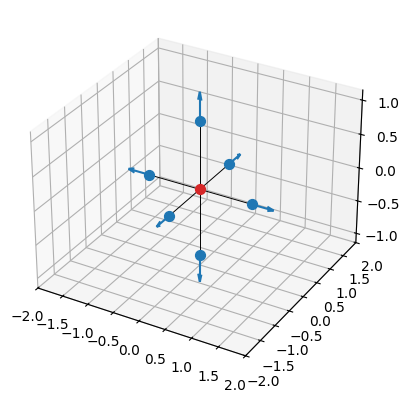

In [3]:
modes = basis['0-th subspace']['basis']
dim = basis['0-th subspace']['dimension']
for idm in range(dim):
   ax = Octahedral .visualize_mode_3D(modes[idm], clist=['tab:blue','tab:red'])
   #
   a = Octahedral .molecular['position'][0]
   for i in range(6):
      b =  Octahedral .molecular['position'][1+i]
      ax.plot([a[0],b[0]],[a[1],b[1]],[a[2],b[2]], color='k', linewidth=0.7)


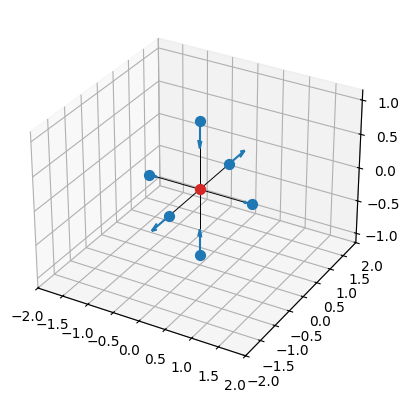

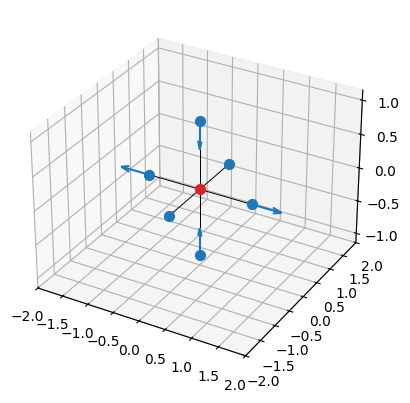

In [2]:
modes = basis['1-th subspace']['basis']
dim = basis['1-th subspace']['dimension']
for idm in range(dim):
   ax = Octahedral .visualize_mode_3D(modes[idm], clist=['tab:blue','tab:red'])
   #
   a = Octahedral .molecular['position'][0]
   for i in range(6):
      b =  Octahedral .molecular['position'][1+i]
      ax.plot([a[0],b[0]],[a[1],b[1]],[a[2],b[2]], color='k', linewidth=0.7)


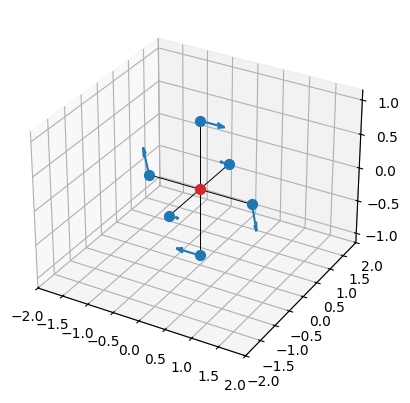

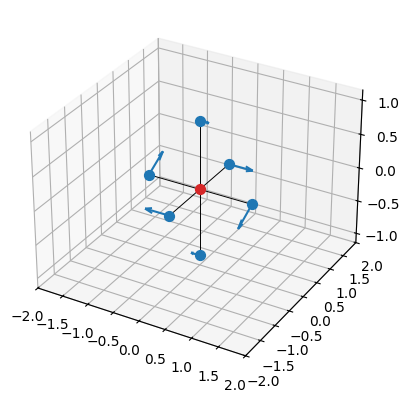

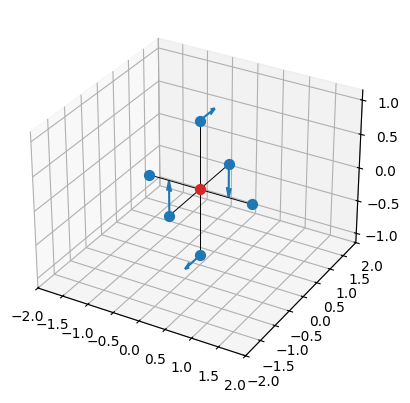

In [4]:
modes = basis['2-th subspace']['basis']
dim = basis['2-th subspace']['dimension']
for idm in range(dim):
   ax = Octahedral .visualize_mode_3D(modes[idm], clist=['tab:blue','tab:red'])
   #
   a = Octahedral .molecular['position'][0]
   for i in range(6):
      b =  Octahedral .molecular['position'][1+i]
      ax.plot([a[0],b[0]],[a[1],b[1]],[a[2],b[2]], color='k', linewidth=0.7)


(3, 21)
(3, 21)
(3, 21)


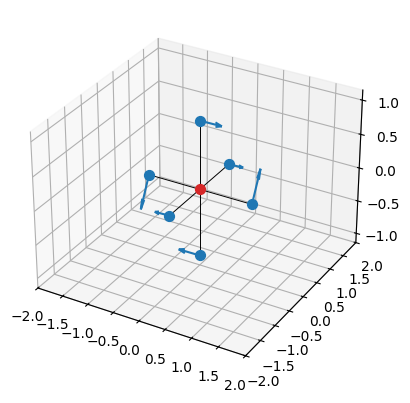

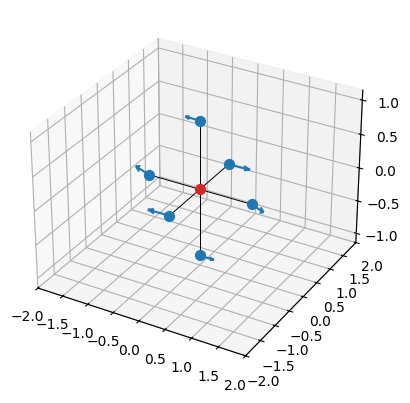

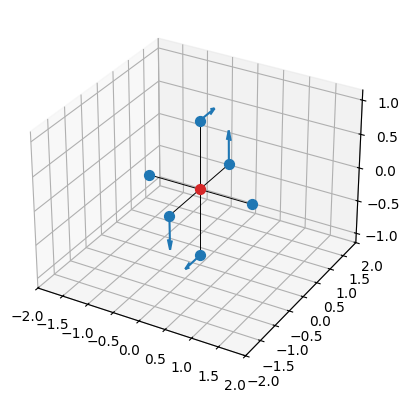

In [5]:
modes = basis['3-th subspace']['basis']
dim = basis['3-th subspace']['dimension']
for idm in range(dim):
   print(modes.shape)
   ax = Octahedral .visualize_mode_3D(modes[idm], clist=['tab:blue','tab:red'])
   #
   a = Octahedral .molecular['position'][0]
   for i in range(6):
      b =  Octahedral .molecular['position'][1+i]
      ax.plot([a[0],b[0]],[a[1],b[1]],[a[2],b[2]], color='k', linewidth=0.7)


(3, 21)
(3, 21)
(3, 21)


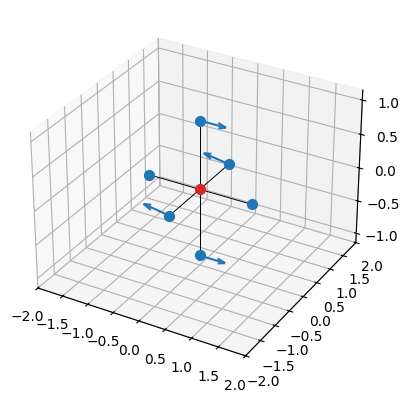

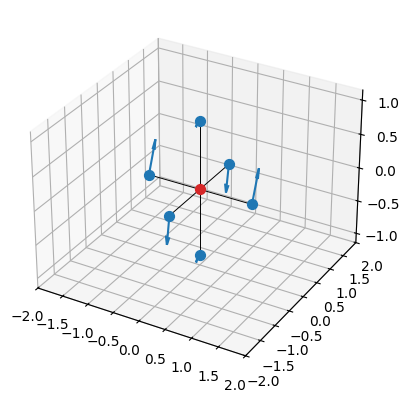

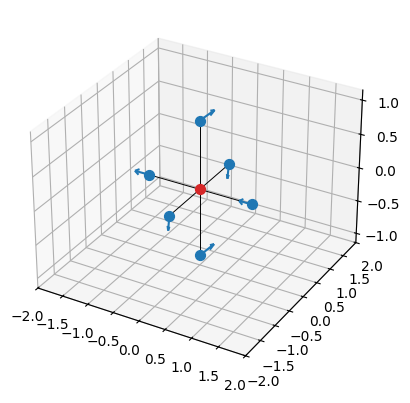

In [6]:
modes = basis['4-th subspace']['basis']
dim = basis['4-th subspace']['dimension']
for idm in range(dim):
   print(modes.shape)
   ax = Octahedral.visualize_mode_3D(modes[idm], clist=['tab:blue','tab:red','tab:green'])
   #
   a = Octahedral .molecular['position'][0]
   for i in range(6):
      b =  Octahedral .molecular['position'][1+i]
      ax.plot([a[0],b[0]],[a[1],b[1]],[a[2],b[2]], color='k', linewidth=0.7)


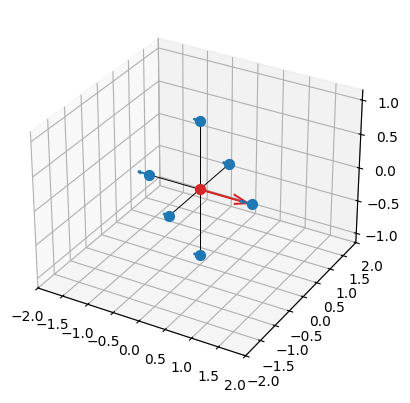

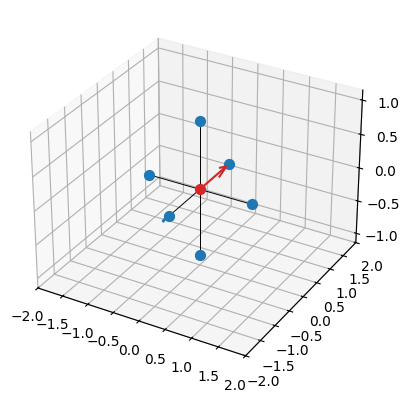

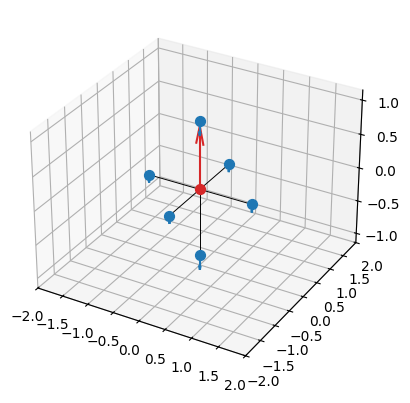

In [7]:
modes = basis['5-th subspace']['basis']
dim = basis['5-th subspace']['dimension']
for idm in range(dim):
   ax = Octahedral .visualize_mode_3D(modes[idm], clist=['tab:blue','tab:red'])
   #
   a = Octahedral .molecular['position'][0]
   for i in range(6):
      b =  Octahedral .molecular['position'][1+i]
      ax.plot([a[0],b[0]],[a[1],b[1]],[a[2],b[2]], color='k', linewidth=0.7)


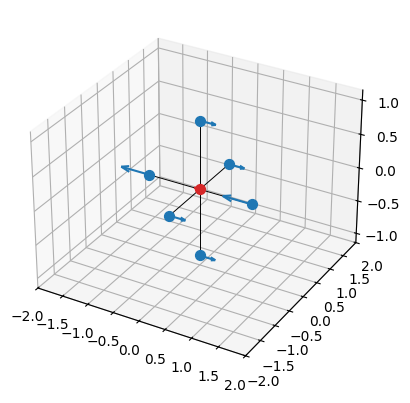

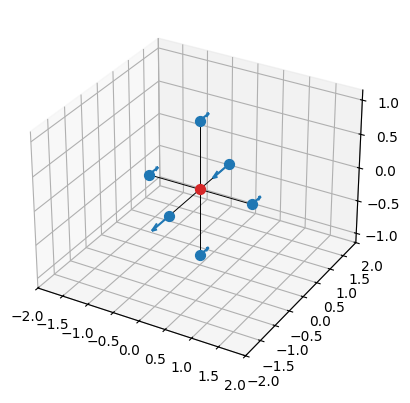

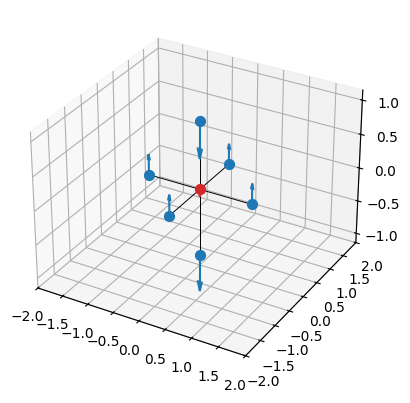

In [8]:
modes = basis['6-th subspace']['basis']
dim = basis['6-th subspace']['dimension']
for idm in range(dim):
   ax = Octahedral .visualize_mode_3D(modes[idm], clist=['tab:blue','tab:red'])
   #
   a = Octahedral .molecular['position'][0]
   for i in range(6):
      b =  Octahedral .molecular['position'][1+i]
      ax.plot([a[0],b[0]],[a[1],b[1]],[a[2],b[2]], color='k', linewidth=0.7)
